蔵本モデルのシミュレーション
===
---
ホタルの同期はなぜ生じるのか？

相互作用のある非線形振動子集団の同期現象

#### 参考
- [蔵本モデル - Wikipedia](https://ja.wikipedia.org/wiki/%E8%94%B5%E6%9C%AC%E3%83%A2%E3%83%87%E3%83%AB)
- [ストロガッツ 非線形ダイナミクスとカオス](
https://www.amazon.co.jp/%E3%82%B9%E3%83%88%E3%83%AD%E3%82%AC%E3%83%83%E3%83%84-%E9%9D%9E%E7%B7%9A%E5%BD%A2%E3%83%80%E3%82%A4%E3%83%8A%E3%83%9F%E3%82%AF%E3%82%B9%E3%81%A8%E3%82%AB%E3%82%AA%E3%82%B9-Steven-H-Strogatz/dp/4621085808
) : p115~

## 0. 準備

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. ErmentroutとRinzelのモデル(1984)
周期刺激を与えられた時のホタル（一匹）の発光リズムに関するモデル。

### 1.1. 導出
- $\theta (t)$をホタルの発光リズムの位相とする。外部からの刺激がないとき、ホタルは振動数$\omega$で発光サイクルを繰り返す。すなわち、
$$
\dot{\theta} = \omega
$$


- このホタルに対して周期的な光の刺激を与えた状況を考える。具体的には、周期刺激の位相を$\Theta$として
$$
\dot{\Theta} = \Omega
$$
という刺激を与えたものとする。


- 刺激に対するホタルの応答をモデル化する。もし刺激がホタルの発光サイクルに先行していればホタルは同期しようとしてスピードをあげる。逆に、もし発光が刺激に先行してしまっていればホタルは減速する。これを数式で表現すると以下のようになる。
$$
\dot{\theta} = \omega + A sin(\Theta - \theta)
$$
ここで$A>0$であり、$A$をリセット強度と呼ぶ。ホタルが自らの周期を調整する能力の度合いを表している。

### 1.2. 実装

In [8]:
# parameter
omega = 2.0
omega_s = 1.5
A = 1.0

# variable
theta = 0
theta_s = 0

# results
theta_list = [theta]
theta_s_list = [theta_s]

dt = 0.01
for step in xrange(1000):
    d_theta = omega + A * np.sin(theta_s - theta)
    theta += d_theta * dt
    theta_s += omega_s * dt
    theta_list.append(theta)
    theta_s_list.append(theta_s)

In [23]:
# TODO: scipyで微分方程式
# TODO: interactiveにするか、複数プロットして分岐を見る

In [16]:
t = np.array(theta_s_list) % (2*np.pi)
t2 = np.array(theta_list) % (2*np.pi)

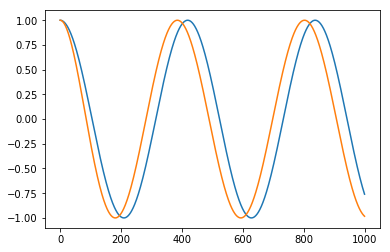

In [21]:
plt.plot(np.cos(t))plt.plot(t%(2*np.pi))
plt.plot(t2%(2*np.pi))
plt.plot(np.cos(t2))

## 2. 蔵本モデル